# Lecture 24: Gaussian Process Regression

https://github.com/jwangjie/Gaussian-Processes-Regression-Tutorial

https://www.apps.stat.vt.edu/leman/VTCourses/GPtutorial.pdf

https://www.mathworks.com/help/stats/gaussian-process-regression-models.html

What is regression? 

Regression is a common machine learning task that can be described as: given some observed data points (training dataset), finding a function that represents the dataset as close as possible, then using the function to make predictions at new data points.

Examples:
 - linear regression: find the best linear function
 - logistic regression: find the best logistic function

什么是回归？

回归是一种常见的机器学习任务，可以描述为：给定一些观察到的数据点（训练数据集），找到一个尽可能接近地表示数据集的函数，然后使用该函数对新数据点进行预测。

例子：
  - 线性回归：找到最好的线性函数
  - 逻辑回归：找到最好的逻辑函数


Take linear equation as an example. Limitations:
  - While simple, the predetermined form may not be flexible enough.
  - How certain the predictions are?

以线性方程为例。 限制：
   - 虽然简单，但预先确定的形式可能不够灵活。
   - 预测的确定性如何？

Gaussian process regression (GPR) models are nonparametric kernel-based probabilistic regression models.
 - nonparametric: Nonparametric regression is a category of regression analysis in which the predictor does not take a predetermined form but is constructed according to information derived from the data. (from Wikipedia)
 - kernel-based: Kernel methods use kernels to map the input data into a different space. SVM is also kernel-based.
 - probabilistic: Probabilisitic models are models that have probabilisitic interpretations, and can handle possibly noisy data and quantify uncertainties for predictions.

高斯过程回归 (GPR) 模型是基于核的非参数概率回归模型。
  - 非参数：非参数回归是回归分析的一类，其中预测变量不采用预定形式，而是根据从数据中得出的信息构建。 （来自维基百科）
  - 基于内核：内核方法使用内核将输入数据映射到不同的空间。 SVM 也是基于内核的。
  - 概率：概率模型是具有概率解释的模型，可以处理可能有噪声的数据并量化预测的不确定性。

In [1]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

import matplotlib.pyplot as plt
import numpy as np


In [2]:
X, y = make_friedman2(n_samples=500)

X.shape和是分别给出和数组y.shape形状的属性。

X是一个 shape 的二维 NumPy 数组(500, 4)，这意味着它有 500 行和 4 列。每行代表一个样本,每列代表一个特征。因此总共有500个样本，每个样本有4个特征。

另一方面,y是形状为 的一维 NumPy 数组(500,)，这意味着它有 500 个元素。每个元素表示与 X 中相应行（样本）关联的目标值或响应变量。因此,总共有 500 个目标值,每个样本一个X

In [3]:
print(X.shape, y.shape)

(500, 4) (500,)


X是形状为(n_samples, n_features)的二维数组,其中n_samples是样本数,n_features是特征数。

X[0,:]选择X数组的第一行,其中包含第一个样本的特征值。换句话说，它为您提供了第一个数据点的特征值。

y是一个一维形状数组(n_samples,)，其中包含每个样本的目标变量值。

y[0]为您提供第一个样本的目标变量值,它对应于X[0,:]给出的特征值

In [6]:
print(X[0,:],y[0])

[9.42071154e+01 1.18315837e+03 1.58733381e-02 4.01750402e+00] 96.06084713415926


gpr.fit(X[:-1,:], y[:-1])正在将高斯过程回归器 (GPR) 拟合到训练数据。
X[:-1,:]是一个numpy数组, 包含除最后一个样本之外的所有训练特征,并且y[:-1]是一个包含这些训练样本的相应目标值的 numpy 数组。
该fit方法将这些训练数据作为输入并训练 GPR 模型。

gpr.predict(X[-1:,:], return_std=True)正在使用经过训练的 GPR 模型来预测新样本的目标值X[-1:,:]。
X[-1:,:]是一个包含新样本特征的 numpy 数组。该predict方法返回新样本的预测目标值和预测的标准差。该return_std=True参数告诉该方法还返回预测的标准偏差,
这对于评估预测的不确定性很有用。

In [7]:
gpr = GaussianProcessRegressor()
gpr.fit(X[:-1,:], y[:-1])
gpr.predict(X[-1:,:], return_std=True)

(array([2.66613263e-101]), array([1.]))

## 1D example

In [10]:
f = lambda x: np.sin(np.pi * x) 
# lambda 函数f返回 pi 乘以输入参数的正弦值x。
#换句话说，f是一个在 -1 和 1 之间振荡的函数，在区间 [0, 1] 中完成一个完整的循环

- X = np.array([-0.9, -0.2, 0.2, 0.7])[:,None]创建一个具有四个点(-0.9、-0.2、0.2、0.7)的一维 numpy 数组, 然后使用索引[:, None]将其转换为具有 4 行和 1 列的二维数组。这通常在机器学习任务中完成，以一种格式表示输入数据，该格式可以由期望具有一列或多列的二维数组的模型处理.

- y = np.sin(np.pi * X[:,0])计算 pi 乘以数组第一列的正弦值X。X[:,0]选择X的第一列, 并np.sin(np.pi * X[:,0])计算 pi 的正弦乘以X的第一列, 这相当于 -0.9 pi、-0.2 pi、0.2 pi 和 0.7 pi 的正弦。

- 生成的y数组包含数组每个元素的正弦值X,可用作回归问题的目标值。在这种情况下, 之前定义的函数f等同于y, 因此y表示回归模型将尝试从输入数据中学习的基本真实值X.




- np.linspace(-1,1,101)创建一个由 101 个均匀分布的值组成的数组，值介于 -1 和 1(含)之间。

- [:, None]用于将一维数组转换为具有单列的二维数组, 这是某些机器学习算法所需要的, 例如此代码中使用的算法。

因此, X_test = np.linspace(-1,1,101)[:,None]创建一个新数组X_test, 由 101 个介于 -1 和 1 之间的值组成, 包含 101 行和 1 列的二维数组。该数组用于表示我们想要使用经过训练的高斯过程回归器进行预测的输入值。

In [11]:
X = np.array([-0.9, -0.2, 0.2, 0.7])[:,None]  # [:,None]: new array
y = np.sin(np.pi * X[:,0])


X_test = np.linspace(-1,1,101)[:,None]


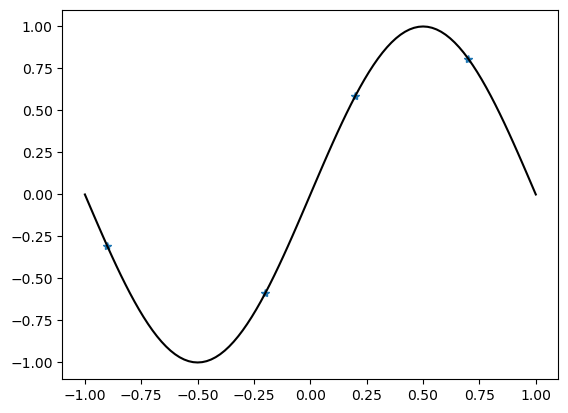

In [12]:
plt.plot(X[:,0], y, '*')
plt.plot(X_test[:,0], f(X_test[:,0]), 'k-')

GaussianProcessRegressor()是模块中的一个类sklearn.gaussian_process, 表示高斯过程回归模型。

gpr = GaussianProcessRegressor()创建此类的实例并初始化模型参数。默认情况下, 它使用常量均值函数和径向基函数 (RBF) 内核作为协方差函数。

gpr.fit(X, y)将高斯过程回归模型拟合到训练数据。它有两个参数: 一个代表输入数据的Xnumpy形状数组, 一个代表目标值的 numpy 形状数组。(n_samples, n_features)y(n_samples,)

该fit()方法使用最大似然估计 (MLE) 方法估计模型参数，例如 RBF 核的长度尺度。拟合后，该模型可用于对新数据点进行预测。

In [13]:
gpr = GaussianProcessRegressor()
gpr.fit(X, y)

GaussianProcessRegressor()

mean是输入的预测目标值的一维数组X_test。预测目标值由测试输入的高斯过程回归模型计算得出。

std也是测试输入处预测分布的标准差的一维数组。标准偏差量化了预测的不确定性。如果return_std设置为True, 则该predict方法除均值外还返回预测分布的标准差。

该方法返回的均值和标准差一起predict可用于绘制高斯过程回归模型的预测均值函数和置信区间。

In [14]:
mean, std = gpr.predict(X_test, return_std=True)

alpha=0.3在填充预测的高斯过程回归量 (GPR) 均值的上限和下限之间的区域时用作参数。

该alpha参数控制填充颜色的透明度。具体来说，它设置颜色的不透明度，这里alpha=1表示完全不透明，alpha=0表示完全透明。在这种情况下，alpha=0.3意味着填充颜色是部分透明的，允许一些底层图和网格线显示出来。

设置alpha为 0 到 1 之间的值对于创建更具视觉吸引力和信息量的图表很有用，因为它有助于减少视觉混乱并使绘制的数据更容易区分

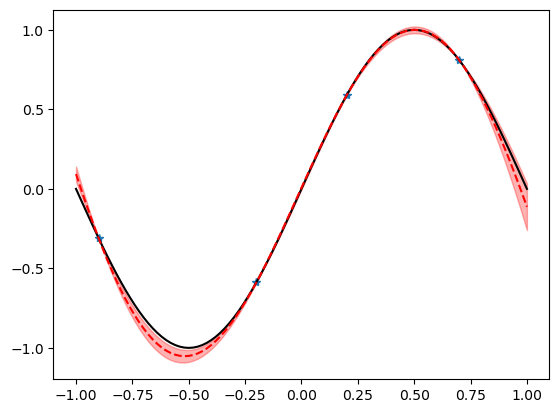

In [15]:
plt.plot(X[:,0], y, '*')
plt.plot(X_test[:,0], f(X_test[:,0]), 'k-')  # plots the true function, 'k-' 代表黑色实线
plt.plot(X_test[:,0], mean, 'r--') # plots the predicted mean of the Gaussian process regressor on the test inputs X_test, with a red dashed line ('r--')
plt.fill_between(X_test[:,0], mean+2*std, mean-2*std, color = 'red', alpha = 0.3)


## The effect of kernels

The kernel determines the covariance.

A kernel looks like this: 
 - $k_{Constant}(x,x') = constant$
 - $k_{WhiteNoise}(x,x') = \text{noise level}  \text{  if  } x==x' \text{  else  } 0 $
 - $k_{RBF}(x,x') = \exp(- \frac{||x-x'||^2}{2l^2})$
 - $k_{DotProd}(x,x') = \sigma_0^2 + x \cdot x'$

You can generate a new kernel by taking the summation or product of two kernels.

内核决定协方差。

内核看起来像这样：
  - $k_{常数}(x,x') = 常数$
  - $k_{WhiteNoise}(x,x') = \text{噪音水平} \text{ if } x==x' \text{ else } 0 $
  - $k_{RBF}(x,x') = \exp(- \frac{||x-x'||^2}{2l^2})$
  - $k_{DotProd}(x,x') = \sigma_0^2 + x \cdot x'$

您可以通过对两个内核求和或乘积来生成新内核。

是ConstantKernel一个核函数，它向协方差矩阵的对角线添加一个常数值。本例中常数值设置为 1.0，constant_value_bounds="fixed"表示该值在拟合过程中保持固定，不进行优化。

length_scale_bounds="fixed"意味着长度尺度参数在拟合过程中保持固定

这个核函数有一个常数项 1.0 和一个长度尺度为 1.0 的 RBF（径向基函数）项。常数项设置预测函数的基线值，而 RBF 项控制函数的平滑度和相关性。

1**2 * RBF(length_scale=1)


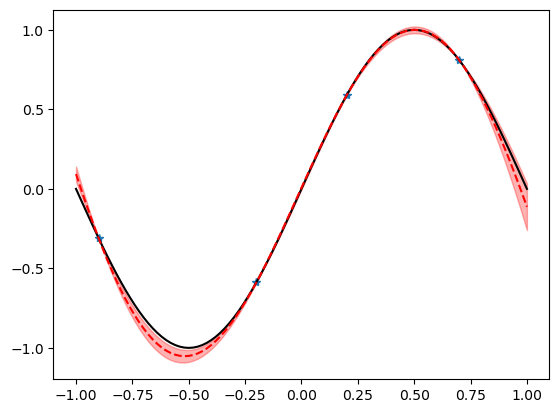

In [11]:
kernel = kernels.ConstantKernel(1.0, constant_value_bounds="fixed") * kernels.RBF(1.0, length_scale_bounds="fixed") # l is 1.0
gpr = GaussianProcessRegressor(kernel)
gpr.fit(X, y)
mean, std = gpr.predict(X_test, return_std=True)
plt.plot(X[:,0], y, '*')
plt.plot(X_test[:,0], f(X_test[:,0]), 'k-')
plt.plot(X_test[:,0], mean, 'r--')
plt.fill_between(X_test[:,0], mean+2*std, mean-2*std, color = 'red', alpha = 0.3)
print(gpr.kernel_)

第一个内核的长度标度为 1.0，第二个内核的长度标度为 0.2。RBF 内核的长度尺度参数决定了拟合函数的平滑度或摆动度。较小的长度尺度使函数更摇摆，而较大的长度尺度使其更平滑。

1**2 * RBF(length_scale=0.2)


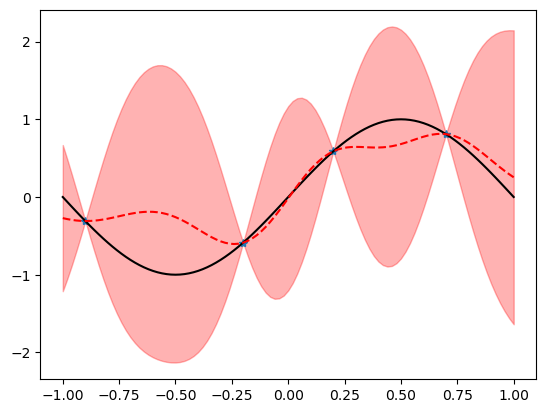

In [12]:
kernel = kernels.ConstantKernel(1.0, constant_value_bounds="fixed") * kernels.RBF(0.2, length_scale_bounds="fixed")
gpr = GaussianProcessRegressor(kernel)
gpr.fit(X, y)
mean, std = gpr.predict(X_test, return_std=True)
plt.plot(X[:,0], y, '*')
plt.plot(X_test[:,0], f(X_test[:,0]), 'k-')
plt.plot(X_test[:,0], mean, 'r--')
plt.fill_between(X_test[:,0], mean+2*std, mean-2*std, color = 'red', alpha = 0.3)
print(gpr.kernel_)

该核函数具有更小的常数项 0.01 和更小的 RBF 长度尺度 0.2。这意味着预测函数将具有更小的基线值，并且对输入的变化更敏感。更小的长度尺度也意味着函数将更加局部化，具有更高的变异度。

总的来说，以下核函数可能更适合于对具有局部特征或更快速变化的函数建模，而第一个核函数可能更适合于具有更渐进变化的更平滑的函数。然而，核函数及其超参数的选择将取决于具体问题和被建模数据的特征。

0.1**2 * RBF(length_scale=0.2)


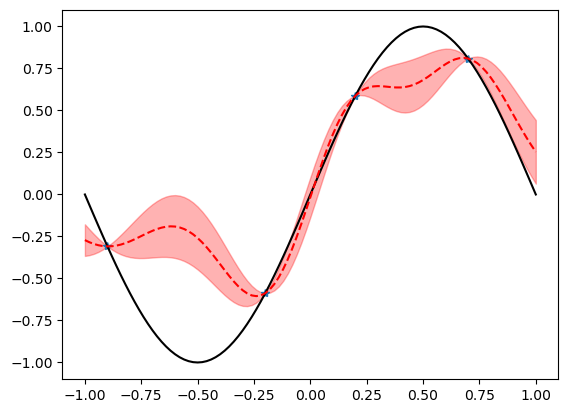

In [13]:
kernel = kernels.ConstantKernel(0.01, constant_value_bounds="fixed") * kernels.RBF(0.2, length_scale_bounds="fixed")
gpr = GaussianProcessRegressor(kernel)
gpr.fit(X, y)
mean, std = gpr.predict(X_test, return_std=True)
plt.plot(X[:,0], y, '*')
plt.plot(X_test[:,0], f(X_test[:,0]), 'k-')
plt.plot(X_test[:,0], mean, 'r--')
plt.fill_between(X_test[:,0], mean+2*std, mean-2*std, color = 'red', alpha = 0.3)
print(gpr.kernel_)

0.649**2 * RBF(length_scale=0.355)


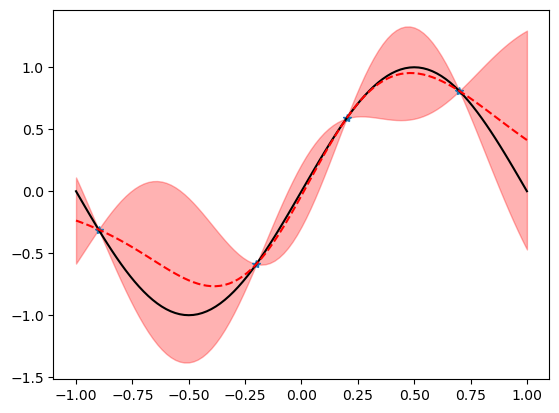

In [14]:
kernel = kernels.ConstantKernel(1.0, constant_value_bounds=[0.2,2]) * kernels.RBF(0.4, length_scale_bounds=[0.3,1])
gpr = GaussianProcessRegressor(kernel)
gpr.fit(X, y)
mean, std = gpr.predict(X_test, return_std=True)
plt.plot(X[:,0], y, '*')
plt.plot(X_test[:,0], f(X_test[:,0]), 'k-')
plt.plot(X_test[:,0], mean, 'r--')
plt.fill_between(X_test[:,0], mean+2*std, mean-2*std, color = 'red', alpha = 0.3)
print(gpr.kernel_)